# Additional Visualizations

Section: c. Determine the country with the highest number of customers who accepted the last campaign.

**Part of:** [marketing_campaign_082825_working.ipynb](./marketing_campaign_082825_working.ipynb)

In [1]:
# Setup and data loading
from utils import (
    ProjectConfig,
    load_intermediate_results,
    save_project_figure,
    reset_plot_settings,
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

config = ProjectConfig()
# Load data from previous notebook
df = load_intermediate_results("data_from_08_step_6.pkl", config)


## c. Determine the country with the highest number of customers who accepted the last campaign.

In [2]:
# Define country columns (dummy-encoded)

country_columns = ['Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND',
'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']

# Verify country columns exist

missing_cols = [col for col in country_columns if col not in df.columns]
if missing_cols:
    print(f"Warning: Missing country columns: {missing_cols}")
    country_columns = [col for col in country_columns if col in df.columns]

print("Available country columns:", country_columns)

# Display basic information about the dataset

print("\nDataset Overview:")
print(f"Total customers: {len(df):,}")
print(f"Total countries: {len(country_columns)}")
print(f"Customers who accepted last campaign: {df['Response'].sum():,}")
print(f"Overall acceptance rate: {(df['Response'].sum() / len(df) * 100):.2f}%")

Available country columns: ['Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']

Dataset Overview:
Total customers: 2,229
Total countries: 8
Customers who accepted last campaign: 334
Overall acceptance rate: 14.98%


In [3]:
# Calculate key metrics by country using dummy columns

country_stats = []

for country_col in country_columns:
    # Extract country name from column (remove ‘Country_’ prefix)
    country_name = country_col.replace('Country_', '')

    # Filter customers from this country (where dummy variable = 1)
    country_customers = df[df[country_col] == 1]

    if len(country_customers) > 0:
        total_customers = len(country_customers)
        accepted_customers = country_customers['Response'].sum()
        acceptance_rate = (accepted_customers / total_customers) * 100

        country_stats.append({
            'Country': country_name,
            'Total_Customers': total_customers,
            'Accepted_Customers': accepted_customers,
            'Acceptance_Rate': acceptance_rate
        })

In [4]:
# Convert to DataFrame

country_stats = pd.DataFrame(country_stats)
country_stats = country_stats.sort_values('Accepted_Customers', ascending=False)
country_stats = country_stats.reset_index(drop=True)
#print(country_stats.columns)

#print("\n" + "="*60)
#print("COUNTRY PERFORMANCE SUMMARY")
#print("="*60)
country_stats_perf = country_stats.copy()
country_stats_perf = country_stats_perf.set_index('Country')
#print(country_stats_perf.round(2))

# Find the answer to our main question
top_count = int(country_stats['Accepted_Customers'].max())
stat_count = country_stats[country_stats['Accepted_Customers']==top_count]
top_country = stat_count['Country'].iloc[0]
top_rate = country_stats['Acceptance_Rate'].max()
stat_rate = country_stats[country_stats['Acceptance_Rate']==top_rate]
top_rate_country = stat_rate['Country'].iloc[0]

#print(top_count)
#print(top_rate)
#print(country_stats[country_stats['Acceptance_Rate']== top_rate])
#stat1 = country_stats[country_stats['Accepted_Customers']== top_count]
#print(stat_rate['Total_Customers'].iloc[0])


#print(f"\n{top_country} has the highest number of customers ({top_count}) who accepted the last campaign")
#print(f"{top_country}'s acceptance rate for the last campaign was {round(stat_count['Acceptance_Rate'].iloc[0],3)}%")
#print(f"{top_rate_country} has the highest acceptance rate ({round(top_rate,3)}%) for the last campaign")
#print(f"However the total number of {top_rate_country} customers ({stat_rate['Total_Customers'].iloc[0]})\
#and the number of {top_rate_country} customers that accepted ({stat_rate['Accepted_Customers'].iloc[0]}) are low.")
#print(f"In comparison the total number of {top_country} customers ({stat_count['Total_Customers'].iloc[0]})\
# and the number of {top_country} customers that accepted ({stat_count['Accepted_Customers'].iloc[0]}) are much higher.")

In [5]:
print(country_stats)

  Country  Total_Customers  Accepted_Customers  Acceptance_Rate
0      SP             1091                 176        16.131989
1      SA              334                  52        15.568862
2      CA              267                  38        14.232210
3     AUS              160                  23        14.375000
4     GER              120                  17        14.166667
5     IND              146                  13         8.904110
6      US              108                  13        12.037037
7      ME                3                   2        66.666667


Saved: figures\Country_with_Highest_Number_of_Customers_Who_Accepted.png


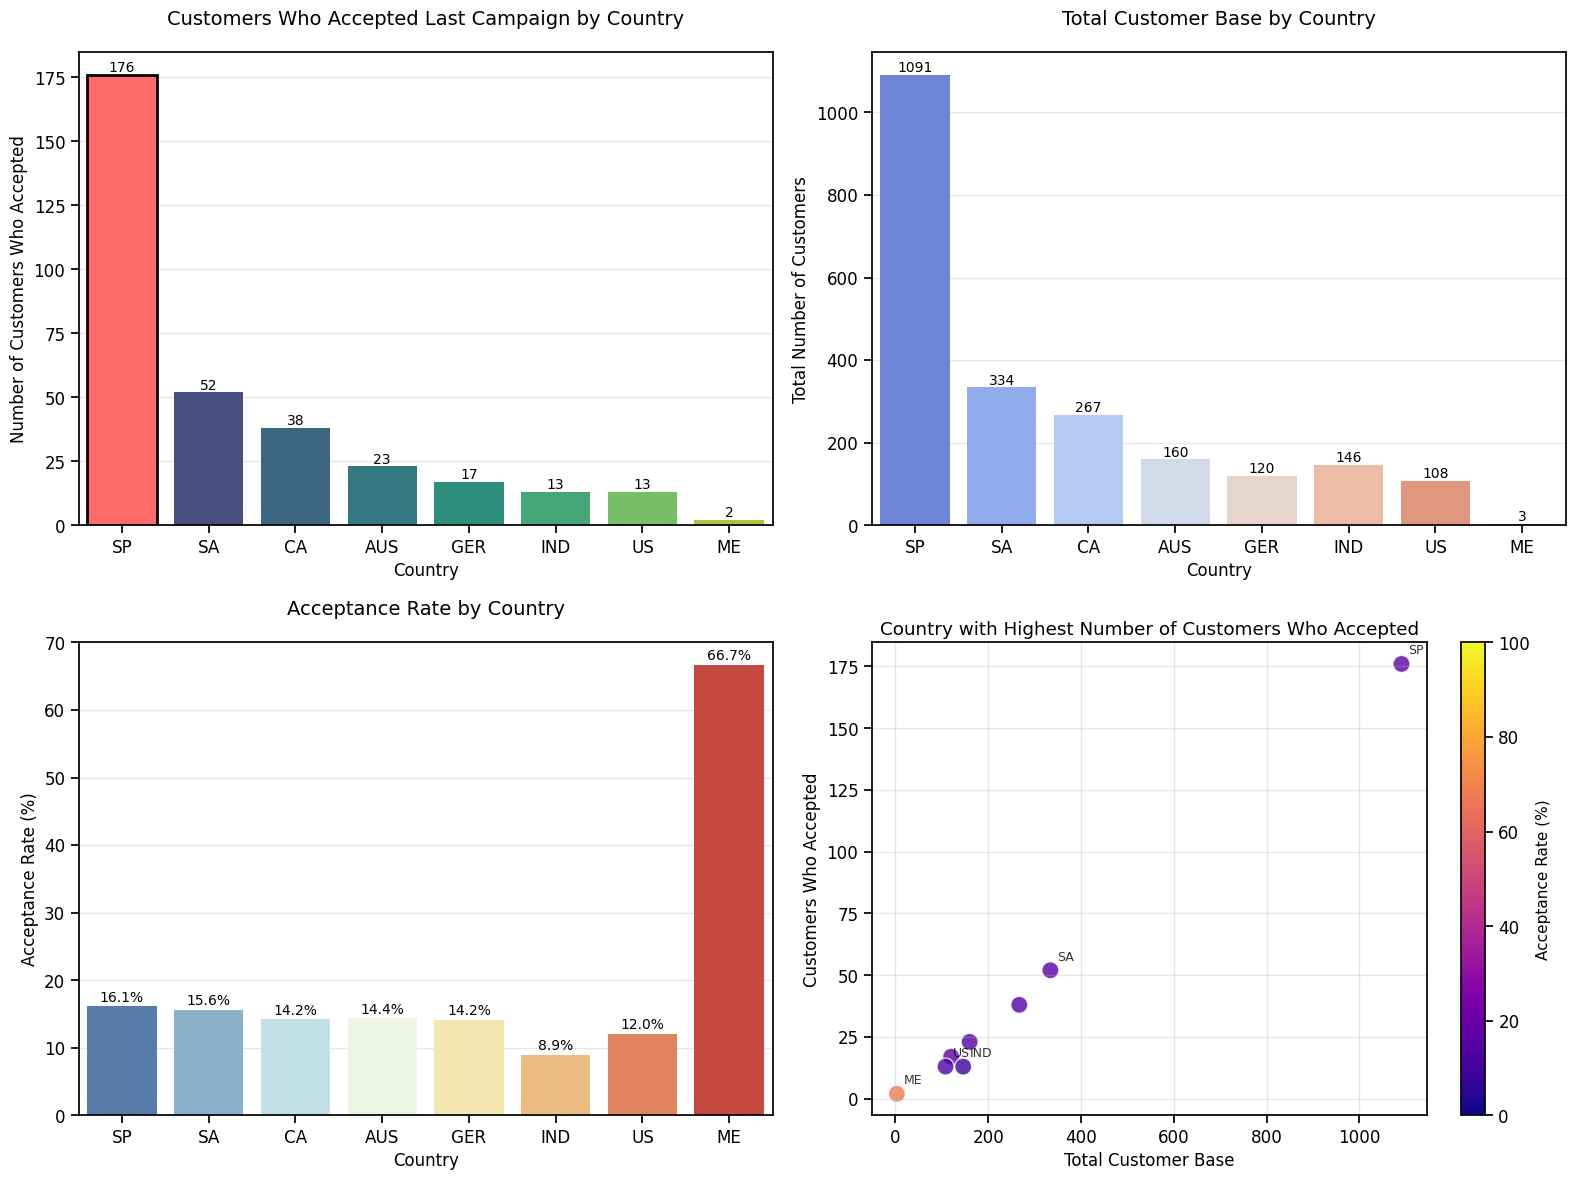

In [6]:
# Create visualizations

# Set the style for better-looking plots
reset_plot_settings()

plt.style.use('default')
#sns.set_palette('husl')
sns.set_context('notebook', font_scale=1.1)

# 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 1. Main Answer: Bar plot of customers who accepted by country
sns.barplot(data=country_stats.reset_index(),
            x='Country',
            y='Accepted_Customers',
            ax=ax1,
            palette='viridis')
ax1.set_title('Customers Who Accepted Last Campaign by Country',
              fontsize=14, pad=20)
ax1.set_ylabel('Number of Customers Who Accepted', fontsize=12)
ax1.set_xlabel('Country', fontsize=12)
ax1.grid(True, axis='y', alpha=0.3)
ax1.set_axisbelow(True)

# Highlight the top country with a different color and annotation
bars = ax1.patches
max_height = max([bar.get_height() for bar in bars])
bars[0].set_color('#FF6B6B')  # Highlight top country in red
bars[0].set_edgecolor('black')
bars[0].set_linewidth(2)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.,
             height,
             f'{int(height)}',
             ha='center', va='bottom',
             fontsize=10)


# 2. Total customers by country (context)
sns.barplot(data=country_stats.reset_index(),
            x='Country', y='Total_Customers',
            ax=ax2,
            palette='coolwarm')
ax2.set_title('Total Customer Base by Country', fontsize=14, pad=20)
ax2.set_ylabel('Total Number of Customers', fontsize=12)
ax2.set_xlabel('Country', fontsize=12)
ax2.grid(True, axis='y', alpha=0.3)
ax2.set_axisbelow(True)

# Add value labels
for i, bar in enumerate(ax2.patches):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.,
             height,
             f'{int(height)}', ha='center', va='bottom',
             fontsize=10)

# 3. Acceptance rates by country
sns.barplot(data=country_stats.reset_index(),
            x='Country', y='Acceptance_Rate',
            ax=ax3,
            palette='RdYlBu_r')
ax3.set_title('Acceptance Rate by Country', fontsize=14, pad=20)
ax3.set_ylabel('Acceptance Rate (%)', fontsize=12)
ax3.set_xlabel('Country', fontsize=12)

# Add percentage labels
for i, bar in enumerate(ax3.patches):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2.,
             height + 0.3,
             f'{height:.1f}%', ha='center', va='bottom',
             fontsize='10')
ax3.grid(True, axis='y', alpha=0.3)
ax3.set_axisbelow(True)

# 4. Scatter plot: Total customers vs Accepted customers
# Create scatter plot with country data
scatter = sns.scatterplot(data=country_stats,
                         x='Total_Customers',
                         y='Accepted_Customers',
                         hue='Acceptance_Rate',
                         hue_norm=(0, 100),  # Set color scale from 0-100%
                         s=150,
                         alpha=0.8,
                         ax=ax4,
                         palette='plasma',
                         legend=False)

# Selective labeling - Label outliers or extreme values
high_acceptance = country_stats['Acceptance_Rate'] > country_stats['Acceptance_Rate'].quantile(0.75)
low_acceptance = country_stats['Acceptance_Rate'] < country_stats['Acceptance_Rate'].quantile(0.25)
high_customers = country_stats['Total_Customers'] > country_stats['Total_Customers'].quantile(0.75)

for idx, row in country_stats.iterrows():
    if high_acceptance.iloc[idx] or low_acceptance.iloc[idx] or high_customers.iloc[idx]:
        ax4.annotate(row['Country'],
                    xy=(row['Total_Customers'], row['Accepted_Customers']),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9,
                    alpha=0.8,
                    ha='left',  # horizontal alignment
                    va='bottom')  # vertical alignment

# Add colorbar/legend for acceptance rate
norm = plt.Normalize(vmin=0, vmax=100)
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax4)
cbar.set_label('Acceptance Rate (%)', fontsize=11)

# Set plot titles and labels
ax4.set_title('Customer Base vs Campaign Acceptance by Country', fontsize=14, pad=20)
ax4.set_xlabel('Total Customer Base', fontsize=12)
ax4.set_ylabel('Customers Who Accepted', fontsize=12)

# Add grid for better readability
ax4.grid(True, alpha=0.3)


plt.tight_layout()
save_project_figure(
    "Country_with_Highest_Number_of_Customers_Who_Accepted",
    "Country with Highest Number of Customers Who Accepted",
    config,
)
plt.show()

In [7]:
# Summary statistics table

print("\n" + "="*80)
print("DETAILED INSIGHTS")
print("="*80)

# Create a more detailed summary

detailed_stats = country_stats.copy()
detailed_stats['Market_Share_Total'] = (detailed_stats['Total_Customers'] / len(df) * 100).round(1)
detailed_stats['Market_Share_Accepted'] = (detailed_stats['Accepted_Customers'] / df['Response'].sum() * 100).round(1)

detailed_stats = detailed_stats.rename(columns={'Accepted_Customers': 'Customers_Accepted'})

# Set the 'Country' column as the index
detailed_stats = detailed_stats.set_index('Country')

print(round(detailed_stats,2))


DETAILED INSIGHTS
         Total_Customers  Customers_Accepted  Acceptance_Rate  \
Country                                                         
SP                  1091                 176            16.13   
SA                   334                  52            15.57   
CA                   267                  38            14.23   
AUS                  160                  23            14.37   
GER                  120                  17            14.17   
IND                  146                  13             8.90   
US                   108                  13            12.04   
ME                     3                   2            66.67   

         Market_Share_Total  Market_Share_Accepted  
Country                                             
SP                     48.9                   52.7  
SA                     15.0                   15.6  
CA                     12.0                   11.4  
AUS                     7.2                    6.9  
GER         

In [8]:
# Key insights
total_accepted = df['Response'].sum()
#print(f'\nKEY INSIGHTS:')
#print(f'• {top_country} leads with {top_count} customers accepting the campaign ({(top_count/total_accepted*100):.1f}% of all acceptances)')
#print(f"• {top_country} has {int(detailed_stats.loc[top_country, 'Total_Customers'])} total customers ({detailed_stats.loc[top_country, 'Market_Share_Total']:.1f}% of customer base)")
#print(f"• {top_country}’s acceptance rate for the last campaign is {detailed_stats.loc[top_country, 'Acceptance_Rate']:.2f}% (vs {(total_accepted/len(df)*100):.2f}% overall)")

# Efficiency insight
most_efficient = detailed_stats.loc[detailed_stats['Acceptance_Rate'].idxmax()]
most_efficient_country = detailed_stats['Acceptance_Rate'].idxmax()
#print(f"• {most_efficient_country} with a {most_efficient['Acceptance_Rate']:.1f}% acceptance rate has the highest accepance rate for the last campaign")
#print(f"  (but only {int(most_efficient['Customers_Accepted'])} total acceptances vs {top_country}’s {top_count})")
# Most efficient country: ME with 66.7% acceptance rate
# (but only 2 total acceptances vs SP’s 176)

In [9]:
# KEY INSIGHTS:
# • SP leads with 176 customers accepting the campaign (52.7% of all acceptances)
# • SP has 1091 total customers (48.9% of customer base)
# • SP’s acceptance rate for the last campaign is 16.13% (vs 14.98% overall)
# • ME with a 66.7% acceptance rate has the highest accepance rate for the last campaign
#   (but only 2 total acceptances vs SP’s 176)

In [10]:

# Save results for next notebook
# save_intermediate_results(df_processed, 'processed_data.pkl', config)
# save_intermediate_results(analysis_results, 'analysis_results.pkl', config)
# print('✓ Results saved for next notebook')